In [1]:
%matplotlib inline
import numpy as np
seed = 14
np.random.seed(seed)
from sklearn.model_selection import GridSearchCV
import numpy as np
from numpy.random import seed as set_seed
from sklearn.model_selection import train_test_split
import pandas as pd

__author__ = "Brendan Griffen"
__email__  = "brendan.f.griffen@gmail.com"
__github__ = "bgriffen"
__date__ = 2021107

In [2]:
features_table = pd.read_table('Input/features.txt')
features = features_table.set_index('geo_accession')
features = np.transpose(features)
GE_table = pd.read_table('Input/GE.txt')
GE = GE_table.set_index('ID_REF')
GE = np.transpose(GE)

In [3]:
features.head()

geo_accession,immvar_id,stimulation,hours,plate,cartridge,lane,date_of_visit,time_of_visit,gender,age,ethnicity,million _pbmc,cd14,cd16,million _dcs,height,weight,systolic_diastolic,bmi
GSM1283355,1627V021412,LPS,2.5,L2a,n98,1,14/02/2012,8:22 AM,F,38,African-American,45.515248,94.5,0.3,0.27,171,61.4,90/62,20.99791389
GSM1283356,1687V021512,LPS,2.5,L2a,n98,2,15/02/2012,7:50 AM,M,31,African-American,39.6973275,92.1,0.8,0.2592,168,79.35,112/76,28.11437075
GSM1283357,1688V021512,LPS,2.5,L2a,n98,3,15/02/2012,8:07 AM,F,35,East Asian,25.529798,95.6,0.7,0.297,156,52.8,90/60,21.69625247
GSM1283358,1237V021512,LPS,2.5,L2a,n98,4,15/02/2012,8:41 AM,F,19,African-American,33.851732,93.8,1,0.3618,170.2,71.65,108/72,24.7341553
GSM1283359,1342V021612,LPS,2.5,L2a,n98,5,16/02/2012,8:24 AM,F,23,East Asian,40.0480825,98.3,0.6,0.3888,167.3,71.4,100/64,25.50975748


In [4]:
GE.head(5)

ID_REF,ABCD2,ABCF1,ABHD10,ACP5,ADAMDEC1,ADCY3,ADORA3,AIM2,ALOX15B,AMPD2,...,VAV2,VCAM1,VCAN,WDFY4,XBP1,ZFP57,ZFY,ZFYVE16,ZNF280D,ZNF513
GSM1283355,1.012076,8.383386,5.802153,12.091593,7.542343,6.300997,4.964055,5.988265,8.473458,7.076113,...,6.765691,3.490123,6.510023,8.581570,10.234123,4.119604,4.299239,9.319548,6.073029,7.163757
GSM1283356,1.773000,8.388087,5.877767,12.055049,6.552340,6.844050,5.127843,3.382415,8.382037,7.200984,...,6.986447,2.042187,5.789094,9.134831,10.086464,3.476282,0.394488,9.238933,6.040267,6.986447
GSM1283357,0.823775,8.531134,5.841011,12.251853,7.882391,6.912869,5.318092,5.946702,8.910013,7.386604,...,6.818563,3.662494,5.635088,9.070607,10.157618,3.662494,4.685578,9.412489,6.181327,7.096315
GSM1283358,0.003372,8.347668,4.910262,11.850821,7.232191,6.251299,4.325300,5.047766,9.336527,6.603285,...,7.014599,2.588334,4.758259,8.734691,10.029895,4.462803,0.003372,9.082857,5.647228,6.873737
GSM1283359,-1.077455,8.670179,5.599678,12.354173,5.112370,6.986839,6.453927,4.079050,8.957344,7.531108,...,7.635645,4.079050,5.561584,10.180522,9.797783,4.183073,-1.077455,9.483196,6.048389,7.364106


In [5]:
from sklearn.preprocessing import LabelEncoder

num_genes = GE.shape[1]
num_samples = GE.shape[0]
myTrait = 'stimulation'  # IFNb, LPS, dNS1, unstim

print('Number of genes: %i' %num_genes)
print('Number of samples: %i' %num_samples)

X = GE.values.astype(float)

Y = features[myTrait]

classes, counts = np.unique(Y, return_counts=True)

num_classes = classes.size

print(dict(zip(classes, counts)))

encoder = LabelEncoder()
encoder.fit(Y)
encodedY = encoder.transform(Y)
#dummyY = np_utils.to_categorical(encodedY)


Number of genes: 414
Number of samples: 2441
{'IFNb': 432, 'LPS': 806, 'dNS1': 469, 'unstim': 734}


## Try ScanPy
... though using patient samples here not scSeq)  
URL: https://scanpy.readthedocs.io/en/latest/index.html

In [6]:
import scanpy as sc
import anndata
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.8.1 anndata==0.7.4 umap==0.5.1 numpy==1.18.5 scipy==1.5.0 pandas==1.0.5 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.9.6 pynndescent==0.5.2


Convert dataframe into annotated dataframe (anndata)

In [15]:
sX = anndata.AnnData(GE)
sX.obs['class'] = Y

In [8]:
# can add filters here if needed, but not in first pass
#sc.pp.filter_cells(sX, min_genes=200)
#sc.pp.filter_genes(sX, min_cells=5)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [11]:
# Can do connective manifold etc. but likely not needed
# sc.tl.paga(sX)
# https://scanpy.readthedocs.io/en/latest/generated/scanpy.tl.paga.html#scanpy-tl-paga

In [16]:
sc.pp.neighbors(sX)
sc.tl.umap(sX)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


... storing 'class' as categorical


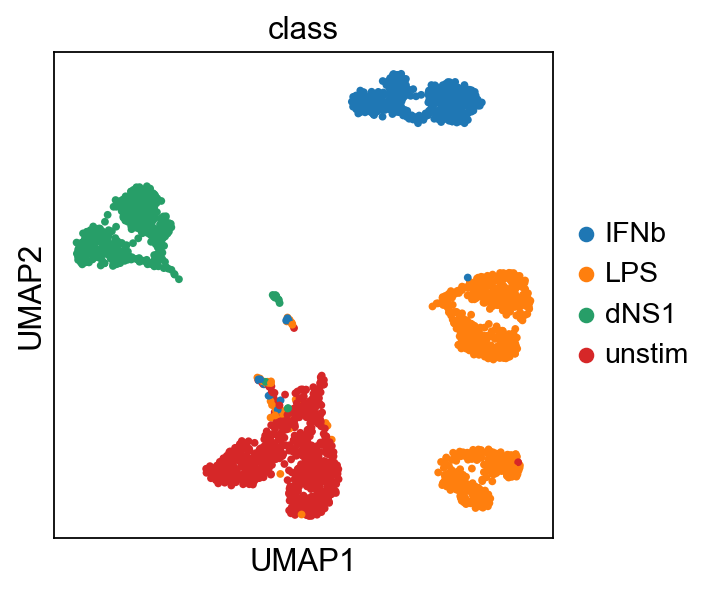

In [17]:
sc.pl.umap(sX,color='class')

In [18]:
sc.tl.leiden(sX,resolution=0.05)

running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


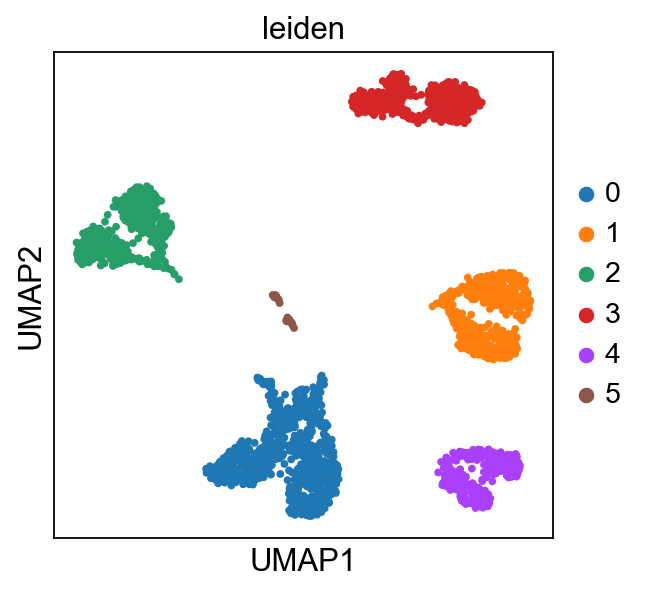

In [19]:
sc.pl.umap(sX,color='leiden')

### Rank Most Relevant Genes

Compute marker genes and plot a heatmap with expression levels of its top 10 marker genes across clusters.

In [22]:
sc.pp.neighbors(sX)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


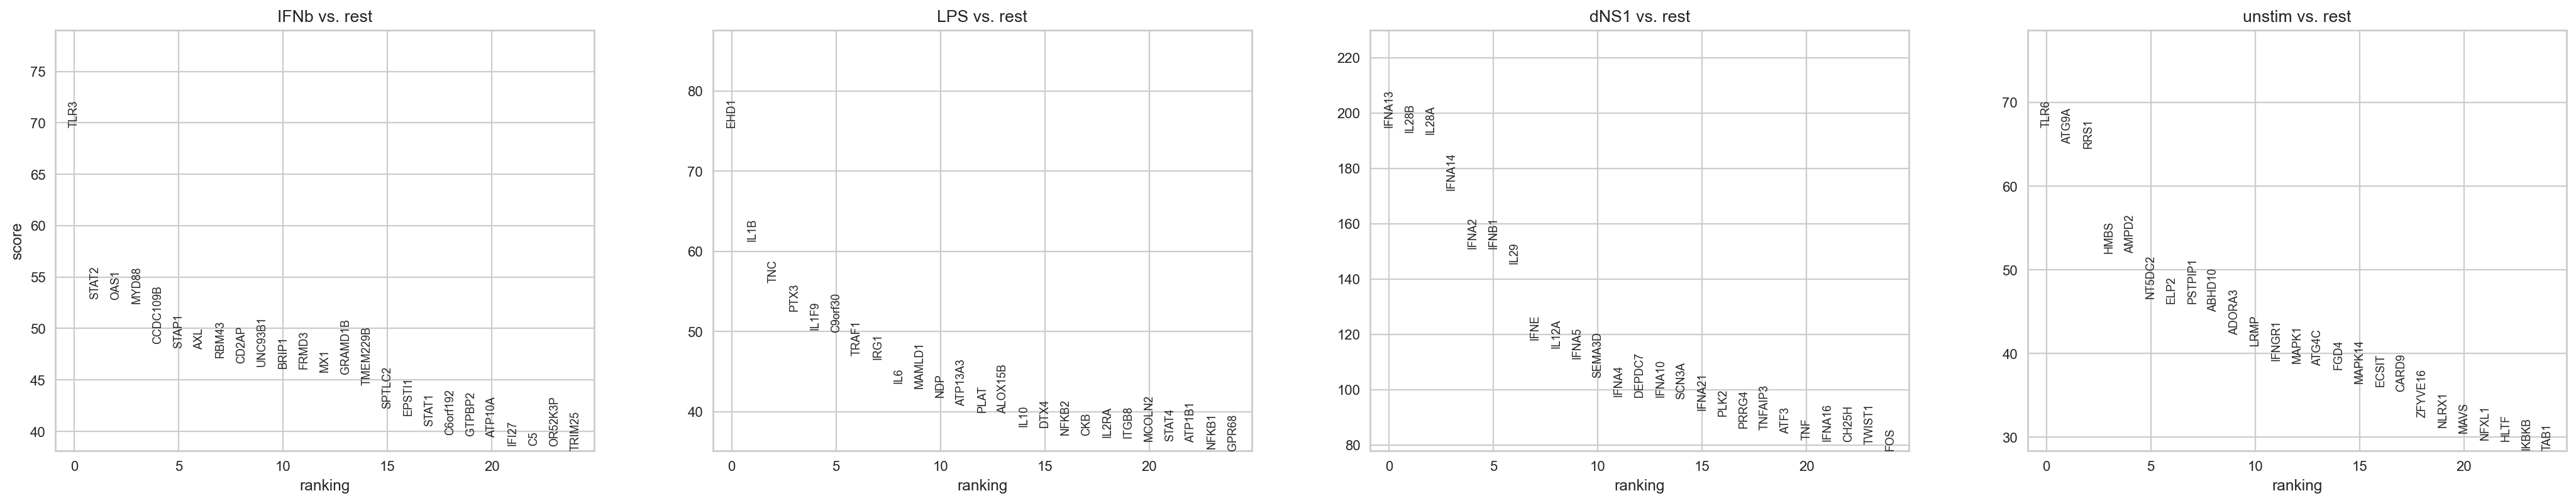

In [24]:
sc.tl.rank_genes_groups(sX, 'class', method='t-test')
sc.pl.rank_genes_groups(sX, n_genes=25,sharey=False)

### Top Upregulated Genes

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_class']`


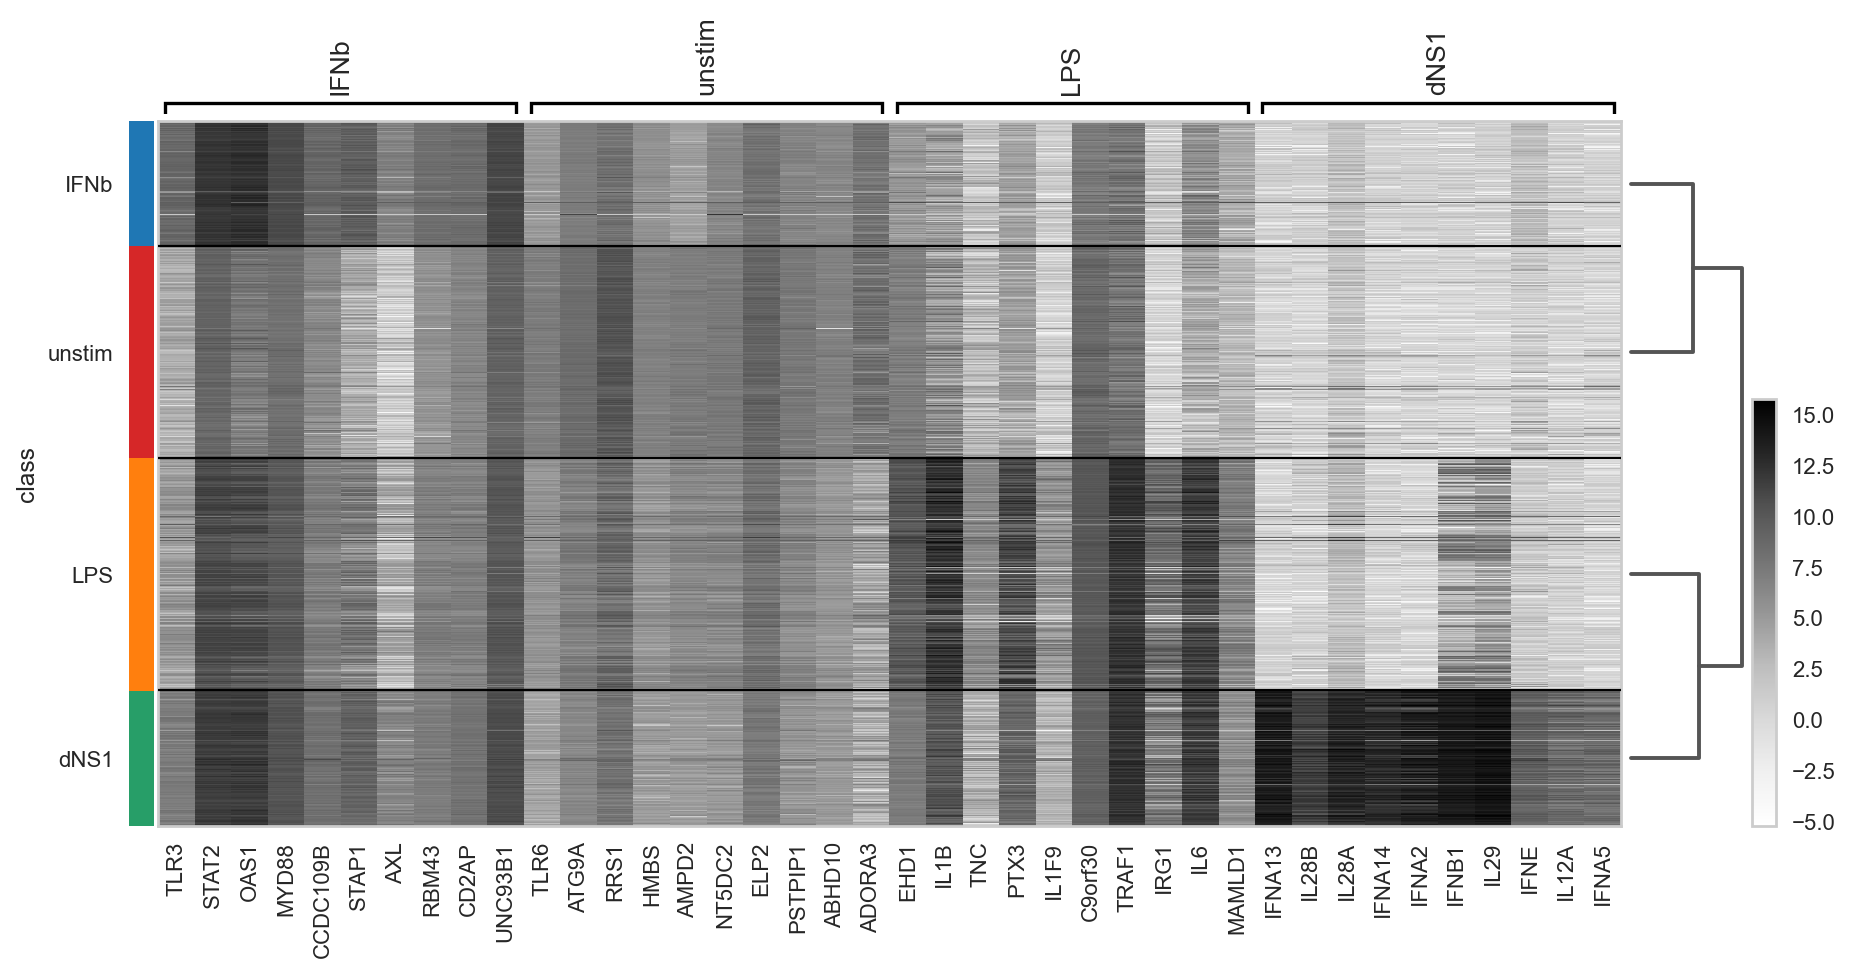

In [25]:
sc.pl.rank_genes_groups_heatmap(sX, n_genes=10, groupby="class")

### Top Downregulated Genes

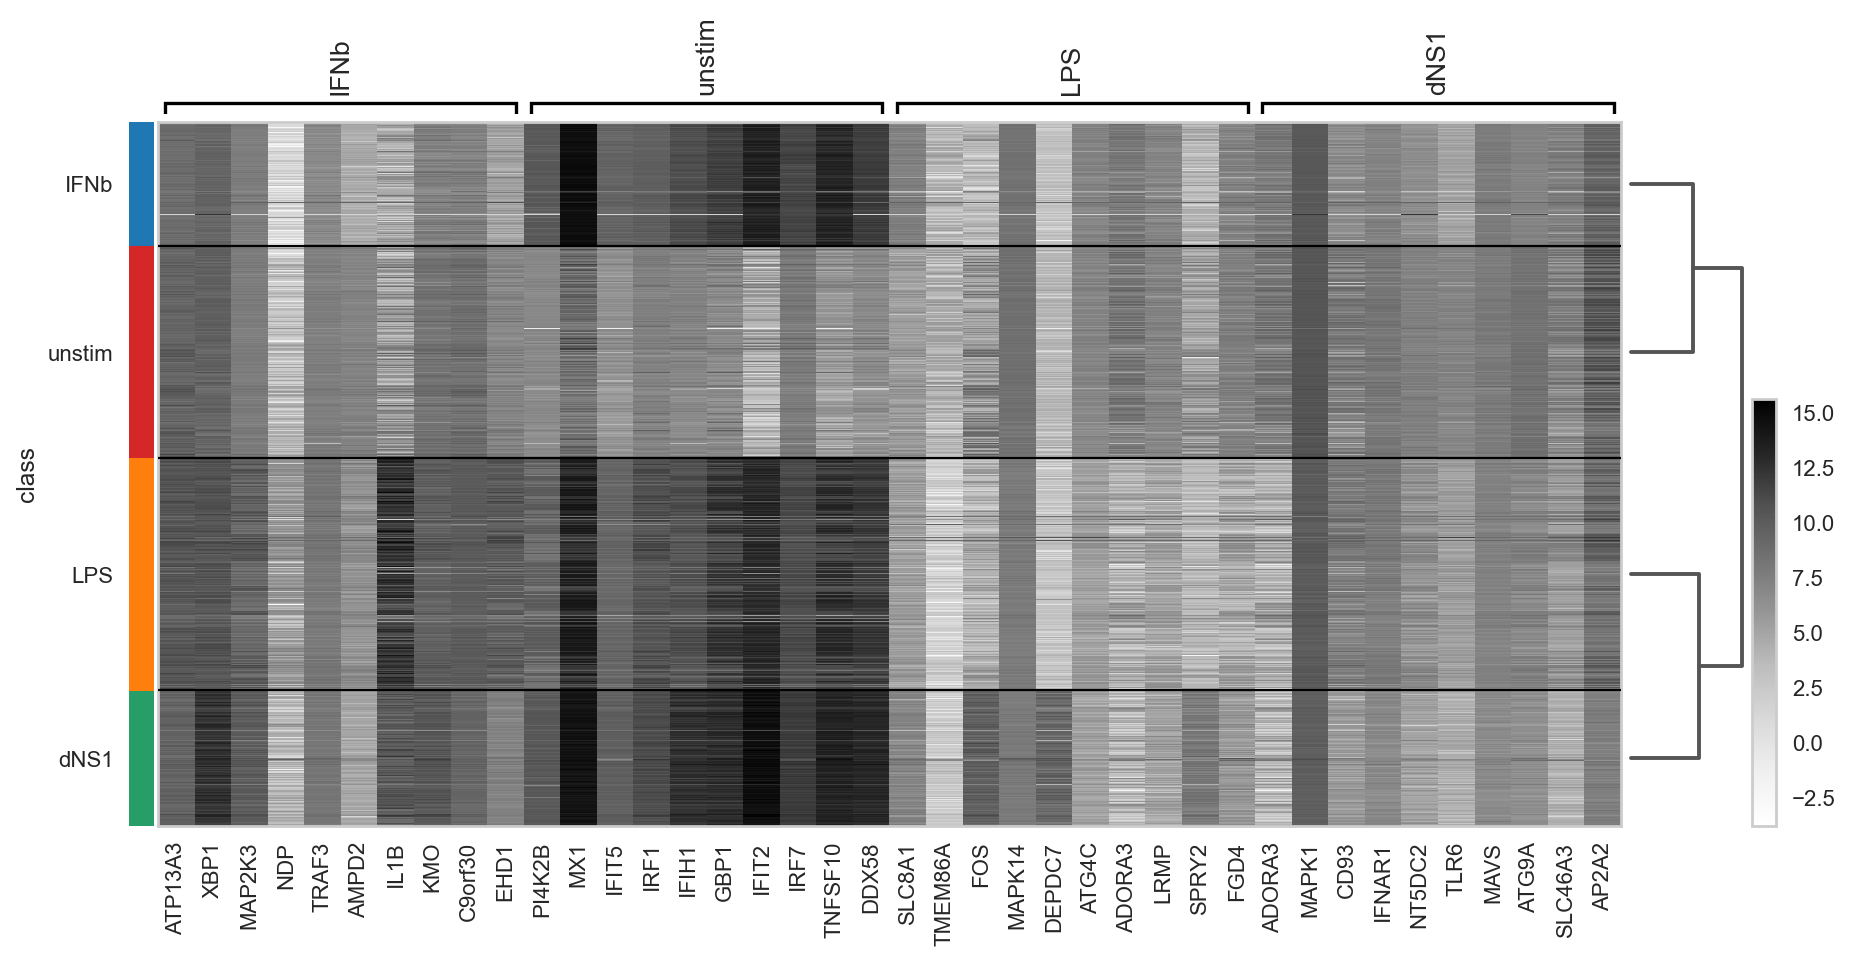

In [29]:
sc.pl.rank_genes_groups_heatmap(sX, n_genes=-10, groupby="class")

### Classification

OK, looks like even basic models get near perfect performance, now check unsupervised classification.

/home/bgriffen/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/bgriffen/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


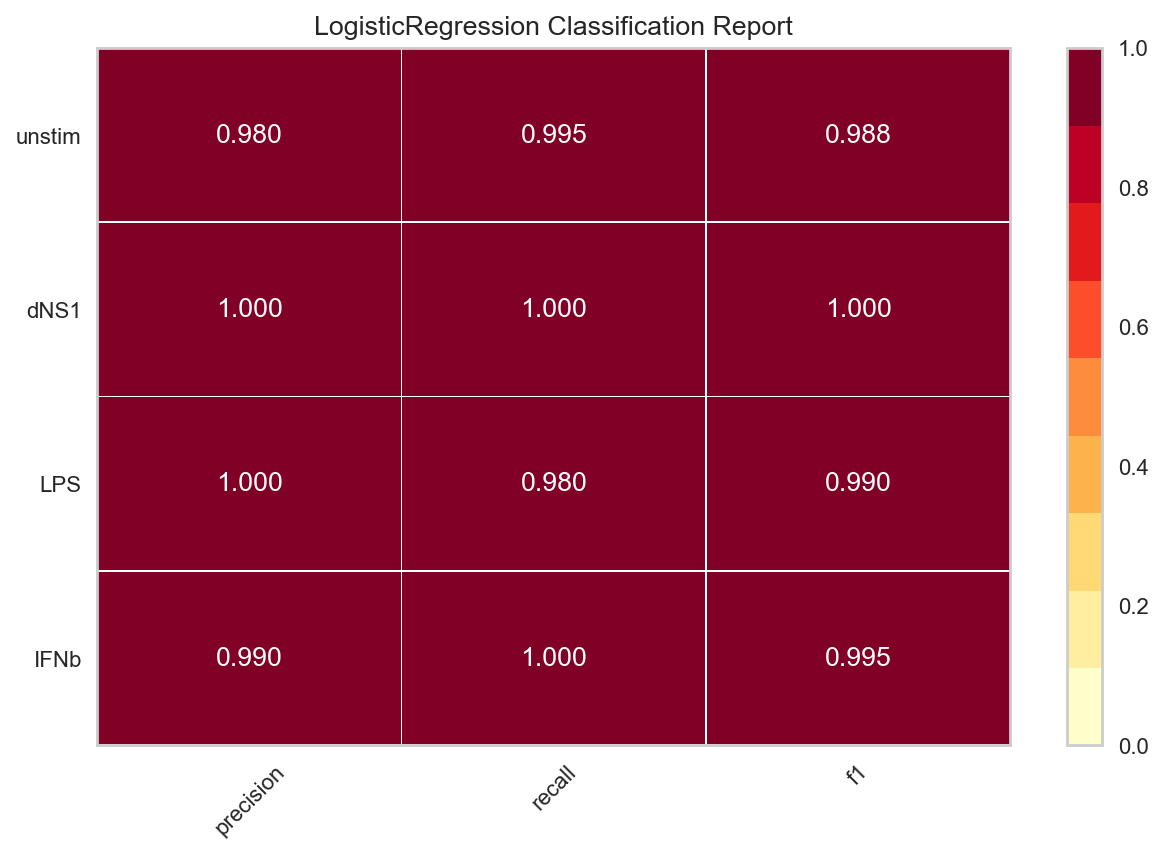

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [28]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Just basic model for now
viz = ClassificationReport(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
